#group members
> Data Preprocessing 
*   63114540197 นายวรพล สุนทร 
*   63114540554 นายฉัตรชัย แก้วฉุย

---

> Data Visualization
*   63114540424 นายพลชกฤษณ์ ศรีสุวรรณ์
*   63114540210 นายวันเจริญ อุปมัย




#Data Preprocessing 



*   เรียกไฟล์



In [1]:
! pip install nltk
! pip install pythainlp
! pip install geopandas
! pip install pandas matplotlib pythainlp
! wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
! pip install emoji
! pip install pythainlp
! pip install demoji
! pip install dash
! pip install dash_bootstrap_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 7.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 1.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=f2e998867c8c4cb4ea1667f0556f842689ed64ccedbb3c7e034faf911ea54b39
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 524.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
! pip install pandas

In [11]:
import pandas as pd
import os
import pythainlp
import nltk
import re
import numpy as np
import seaborn as sns
import folium
import gspread as gs

from pythainlp.util import Trie 
from nltk.tokenize import word_tokenize
from pythainlp.corpus.common import thai_words
from google.colab import drive

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
import geopandas as gpd

from pythainlp.corpus.common import thai_stopwords
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.font_manager as fm

from sklearn.feature_extraction.text import CountVectorizer
import emoji
import demoji
from pythainlp.util import normalize
from itertools import chain
from pythainlp import Tokenizer
from pythainlp.util import dict_trie
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

from sklearn.model_selection import train_test_split
import matplotlib as mpl

ModuleNotFoundError: No module named 'pandas'

In [ ]:
thai_stopwords = list(thai_stopwords())
thai_stopwords

['รึ',
 'ใดๆ',
 'เคย',
 'เป็นที',
 'ช่วงแรก',
 'บอก',
 'ส่วนใด',
 'เป็น',
 'ที',
 'ก็ได้',
 'ด้าน',
 'ช่วงที่',
 'เพียงแค่',
 'ควร',
 'ใคร่',
 'อย่างโน้น',
 'ยิ่งแล้ว',
 'เพื่อว่า',
 'หากว่า',
 'ตามๆ',
 'เมื่อคืน',
 'ใหญ่โต',
 'กันและกัน',
 'ระหว่าง',
 'จวนเจียน',
 'นอกจากว่า',
 'ไฉน',
 'มึง',
 'ที่นี้',
 'เพียงเพื่อ',
 'เฉพาะ',
 'ร่วม',
 'ส่วนน้อย',
 'ไป',
 'คราวนี้',
 'ยก',
 'ยังคง',
 'ยอมรับ',
 'พวกกู',
 'ใช้',
 'ขั้น',
 'ยืนยัน',
 'เป็นแต่เพียง',
 'แบบ',
 'นี่แหละ',
 'ดั่ง',
 'เช่นเคย',
 'เธอ',
 'นั้นไว',
 'ซะ',
 'สิ่งไหน',
 'จนกว่า',
 'ในระหว่าง',
 'ก็ตาม',
 'แค่ไหน',
 'นี้แหล่',
 'ไหนๆ',
 'คราวๆ',
 'ตลอดไป',
 'เรื่อย',
 'ครั้งใด',
 'สําหรับ',
 'เมื่อครั้งก่อน',
 'อย่างละ',
 'เสียด้วย',
 'จน',
 'เมื่อคราวก่อน',
 'ภายภาคหน้า',
 'สำคัญ',
 'เหล่า',
 'คือ',
 'ทํา',
 'ส่วนใหญ่',
 'มัน',
 'ก็จะ',
 'นั้นๆ',
 'เท่ากับ',
 'ดั่งเคย',
 'เชื่อว่า',
 'พอควร',
 'แก',
 'เช่นใด',
 'เริ่ม',
 'คล้ายกันกับ',
 'จริงๆ',
 'ถือ',
 'พร้อม',
 'สบาย',
 'ไว้',
 'น่าจะ',
 'มัก',
 'เกี่ยวเนื่อง',
 'เกิด',
 'ใ

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/Shareddrives/Data Analytics"
print(os.listdir(data_path))

['ประเภท.txt', 'BMASubDistrict_Polygon', 'วิดีโอ', 'ดึงข้อมูล 7 วัน', 'Project Exploratory Data Analytics.gsheet', 'ดึงข้อมูล 30 วัน', 'Data set Traffy Fondue.gsheet', 'Taffy Fondue Data', 'Traffy Fondue Datasets.csv', 'ไฟล์เก่า', 'Taffy Fondue.ipynb', 'Data Analytics.gjam', 'Traffy Fondue Datasets.gsheet', 'ทดลอง']


#Preliminary data separation

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/Data Analytics/Traffy Fondue Datasets.csv", encoding="utf-8")
df.head()

,results.message_id,results.type,results.type_id,results.org,results.comment,results.ticket_id,results.coords.1,results.coords.2,results.photo,results.after_photo,results.address,results.district,results.subdistrict,results.province,results.timestamp,results.problem_type_abdul,results.status,results.star,results.count_reopen,results.state
0,211699.0,ถนน,12.0,กรุงเทพมหานคร,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",2022-88HQGQ,100.49070,13.78322,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,214 ถนน จรัญสนิทวงศ์ แขวง บางบำหรุ เขตบางพลัด ...,บางพลัด,บางบำหรุ,กรุงเทพมหานคร,2022-09-01 23:59:34.658744+00,{ถนน},finish,NaN,1,เสร็จสิ้น
1,211698.0,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",6.0,กรุงเทพมหานคร,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,2022-7Y2Z2E,100.49833,13.75729,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,40 ถนน ราชดำเนินกลาง แขวง วัดบวรนิเวศ เขตพระนค...,พระนคร,บวรนิเวศ,กรุงเทพมหานคร,2022-09-01 23:59:08.314642+00,"{ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด}",finish,NaN,0,เสร็จสิ้น
2,211697.0,ถนน,12.0,กรุงเทพมหานคร,ถนนชำรุด,2022-8ZTQEB,100.60857,13.93730,https://storage.googleapis.com/traffy_public_b...,NaN,180/72 ซอย วิภาวดีรังสิต 33 แขวง สนามบิน เขตดอ...,ดอนเมือง,สีกัน,กรุงเทพมหานคร,2022-09-01 23:59:07.096958+00,{ถนน},inprogress,NaN,0,รอรับเรื่อง
3,211696.0,"ต้นไม้,สายไฟ",12.0,กรุงเทพมหานคร,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,2022-M9CTME,100.64842,13.76966,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,296 ถนนสุขาภิบาล 1 แขวงคลองจั่น เขตบางกะปิ จัง...,บางกะปิ,คลองจั่น,กรุงเทพมหานคร,2022-09-01 23:58:22.963612+00,"{ต้นไม้,สายไฟ}",finish,5.0,0,เสร็จสิ้น
4,211695.0,"ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด",12.0,กรุงเทพมหานคร,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,2022-MPVAYN,100.49841,13.75727,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,40 ถนน ราชดำเนินกลาง แขวง วัดบวรนิเวศ เขตพระนค...,พระนคร,บวรนิเวศ,กรุงเทพมหานคร,2022-09-01 23:58:20.994722+00,"{ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด}",finish,NaN,0,เสร็จสิ้น


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34856 entries, 0 to 34855
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   results.message_id          34824 non-null  float64
 1   results.type                25682 non-null  object 
 2   results.type_id             34855 non-null  float64
 3   results.org                 34824 non-null  object 
 4   results.comment             34824 non-null  object 
 5   results.ticket_id           34824 non-null  object 
 6   results.coords.1            34856 non-null  float64
 7   results.coords.2            34856 non-null  float64
 8   results.photo               34856 non-null  object 
 9   results.after_photo         21866 non-null  object 
 10  results.address             34824 non-null  object 
 11  results.district            34822 non-null  object 
 12  results.subdistrict         34822 non-null  object 
 13  results.province            348

In [ ]:
df_isnull = df.isnull().sum()
df_isnull

results.message_id               32
results.type                   9174
results.type_id                   1
results.org                      32
results.comment                  32
results.ticket_id                32
results.coords.1                  0
results.coords.2                  0
results.photo                     0
results.after_photo           12990
results.address                  32
results.district                 34
results.subdistrict              34
results.province                 34
results.timestamp                 0
results.problem_type_abdul       83
results.status                    0
results.star                  23563
results.count_reopen              0
results.state                     5
dtype: int64

In [ ]:
df = df.drop(["results.message_id", "results.type_id", "results.org", "results.star", 
              "results.ticket_id", "results.photo", "results.after_photo", "results.count_reopen",
              "results.address", "results.province", "results.state", "results.problem_type_abdul"], axis = 1)
df.head()

,results.type,results.comment,results.coords.1,results.coords.2,results.district,results.subdistrict,results.timestamp,results.status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
4,"ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49841,13.75727,พระนคร,บวรนิเวศ,2022-09-01 23:58:20.994722+00,finish


In [ ]:
df.columns = df.columns.str.replace('results.', '')
df.head()

<ipython-input-11-1024bae51d82>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('results.', '')


,type,comment,coords.1,coords.2,district,subdistrict,timestamp,status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
4,"ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49841,13.75727,พระนคร,บวรนิเวศ,2022-09-01 23:58:20.994722+00,finish


In [ ]:
df.rename(columns = {'coords.1':'longitude', 'coords.2':'latitude'}, inplace = True)
df

,type,comment,longitude,latitude,district,subdistrict,timestamp,status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
4,"ถนน,ความปลอดภัย,คนจรจัด,ความสะอาด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49841,13.75727,พระนคร,บวรนิเวศ,2022-09-01 23:58:20.994722+00,finish
...,...,...,...,...,...,...,...,...
34851,NaN,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,100.64515,13.87506,บางเขน,ท่าแร้ง,2022-10-31 00:15:10.752973+00,finish
34852,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:11:10.245399+00,finish
34853,ถนน,ถนนชำรุดเสียหาย,100.74670,13.77532,ลาดกระบัง,คลองสามประเวศ,2022-10-31 00:06:29.012243+00,inprogress
34854,NaN,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,100.38631,13.75691,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:04:27.496973+00,inprogress


In [ ]:
df = df.drop_duplicates(subset=['comment'], keep='first')
df

,type,comment,longitude,latitude,district,subdistrict,timestamp,status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
5,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,2022-09-01 23:58:15.027938+00,inprogress
...,...,...,...,...,...,...,...,...
34850,ทางเท้า,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,100.52327,13.73314,บางรัก,มหาพฤฒาราม,2022-10-31 00:20:02.522149+00,finish
34851,NaN,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,100.64515,13.87506,บางเขน,ท่าแร้ง,2022-10-31 00:15:10.752973+00,finish
34852,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:11:10.245399+00,finish
34854,NaN,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,100.38631,13.75691,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:04:27.496973+00,inprogress


In [ ]:
df = df[pd.notnull(df['comment'])]
df

,type,comment,longitude,latitude,district,subdistrict,timestamp,status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
5,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,2022-09-01 23:58:15.027938+00,inprogress
...,...,...,...,...,...,...,...,...
34850,ทางเท้า,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,100.52327,13.73314,บางรัก,มหาพฤฒาราม,2022-10-31 00:20:02.522149+00,finish
34851,NaN,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,100.64515,13.87506,บางเขน,ท่าแร้ง,2022-10-31 00:15:10.752973+00,finish
34852,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:11:10.245399+00,finish
34854,NaN,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,100.38631,13.75691,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:04:27.496973+00,inprogress


In [ ]:
district_dataset = ["พระนคร", "ดุสิต", "หนองจอก", "บางรัก", "บางเขน", "บางกะปิ", "ปทุมวัน", "ป้อมปราบศัตรูพ่าย", "พระโขนง", "มีนบุรี", "ลาดกระบัง", "ยานนาวา", "สัมพันธวงศ์", "พญาไท"
    , "ธนบุรี", "บางกอกใหญ่", "ห้วยขวาง", "คลองสาน", "ตลิ่งชัน", "บางกอกน้อย", "บางขุนเทียน", "ภาษีเจริญ", "หนองแขม", "ราษฎร์บูรณะ", "บางพลัด", "ดินแดง", "บึงกุ่ม", "สาทร", "บางซื่อ"
    , "จตุจักร", "บางคอแหลม", "ประเวศ", "คลองเตย", "สวนหลวง", "จอมทอง", "ดอนเมือง", "ราชเทวี", "ลาดพร้าว", "วัฒนา", "บางแค", "หลักสี่", "สายไหม", "คันนายาว", "สะพานสูง"
    , "วังทองหลาง", "คลองสามวา", "บางนา", "ทวีวัฒนา", "ทุ่งครุ", "บางบอน"]

In [ ]:
df = df[df['district'].isin(district_dataset)]
df

,type,comment,longitude,latitude,district,subdistrict,timestamp,status
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish
5,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,2022-09-01 23:58:15.027938+00,inprogress
...,...,...,...,...,...,...,...,...
34850,ทางเท้า,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,100.52327,13.73314,บางรัก,มหาพฤฒาราม,2022-10-31 00:20:02.522149+00,finish
34851,NaN,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,100.64515,13.87506,บางเขน,ท่าแร้ง,2022-10-31 00:15:10.752973+00,finish
34852,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:11:10.245399+00,finish
34854,NaN,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,100.38631,13.75691,ทวีวัฒนา,ทวีวัฒนา,2022-10-31 00:04:27.496973+00,inprogress


In [ ]:
df['comment'].astype(str)

0        เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...
1        ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2                                                 ถนนชำรุด
3        รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...
5                                  ป้ายข้ามถนนพลิกกลับด้าน
                               ...                        
34850       วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง
34851         รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ
34852    ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...
34854                       รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​
34855    ตั้งวางแผงขายของ และปิดงย่างบนทางเท้า\nกีดขวาง...
Name: comment, Length: 30600, dtype: object

In [ ]:
df[["date", "time1"]] = df['timestamp'].str.split(' ', expand=True)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,type,comment,longitude,latitude,district,subdistrict,timestamp,status,date,time1
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,2022-09-01 23:59:34.658744+00,finish,2022-09-01,23:59:34.658744+00
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,2022-09-01 23:59:08.314642+00,finish,2022-09-01,23:59:08.314642+00
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,2022-09-01 23:59:07.096958+00,inprogress,2022-09-01,23:59:07.096958+00
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,2022-09-01 23:58:22.963612+00,finish,2022-09-01,23:58:22.963612+00
5,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,2022-09-01 23:58:15.027938+00,inprogress,2022-09-01,23:58:15.027938+00


In [ ]:
df = df.drop(["timestamp", "time1"], axis = 1)
df.head()

,type,comment,longitude,latitude,district,subdistrict,status,date
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,finish,2022-09-01
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,finish,2022-09-01
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,inprogress,2022-09-01
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,finish,2022-09-01
5,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,inprogress,2022-09-01


In [ ]:
df['date'] = df['date'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30600 entries, 0 to 34855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   type         22742 non-null  object        
 1   comment      30600 non-null  object        
 2   longitude    30600 non-null  float64       
 3   latitude     30600 non-null  float64       
 4   district     30600 non-null  object        
 5   subdistrict  30600 non-null  object        
 6   status       30600 non-null  object        
 7   date         30600 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.1+ MB


In [ ]:
fp = 'thsarabunnew-webfont.ttf'

In [ ]:
"""df_cloud = "".join(text for text in df["comment"])
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,
                      background_color = 'white', 
                      max_words=2000, height = 2000, width=4000, 
                      regexp=reg).generate(df_cloud)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()"""

'df_cloud = "".join(text for text in df["comment"])\nreg = r"[ก-๙a-zA-Z\']+"\nwordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,\n                      background_color = \'white\', \n                      max_words=2000, height = 2000, width=4000, \n                      regexp=reg).generate(df_cloud)\nplt.figure(figsize = (16,8))\nplt.imshow(wordcloud)\nplt.axis(\'off\')\nplt.show()'

#ข้อมูลที่ทำการ cleaning

In [ ]:
df_tokens = df
df_tokens = df_tokens.drop(["type", "longitude", "latitude", "district", "status", "date" ], axis = 1)
df_tokens.head()

,comment,subdistrict
0,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",บางบำหรุ
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,บวรนิเวศ
2,ถนนชำรุด,สีกัน
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,คลองจั่น
5,ป้ายข้ามถนนพลิกกลับด้าน,มีนบุรี


In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ", "-", ",", "+", "x", "o", "*",
                                                 "/", "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "{", "}",
                                                 "[", "]", "(", ")", "^", "@", "$", "%", "&", "|", "<", ">", "=",
                                                 "๑", "๒", "๓", "๔", "๕", "๖", "๗", "๘", "๙", "๐", "a", "b", "c",
                                                 "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "p", "q",
                                                 "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D",
                                                 "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q",
                                                 "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "é", "~", "`", ""))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    return final
df_tokens['comment_tokens'] = df_tokens['comment'].apply(text_process)
df_tokens.head()

,comment,subdistrict,comment_tokens
0,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนนชำรุด,สีกัน,ถนนชำรุด
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
5,ป้ายข้ามถนนพลิกกลับด้าน,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน


In [ ]:
df_tokens['comment_tokens'] =  df_tokens['comment_tokens'].apply(lambda x: x.replace('"', ''))
df_tokens['comment_tokens'] =  df_tokens['comment_tokens'].apply(lambda x: x.replace("'", ''))

In [ ]:
df_tokens = df_tokens[pd.notnull(df_tokens['comment_tokens'])]
df_tokens

,comment,subdistrict,comment_tokens
0,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนนชำรุด,สีกัน,ถนนชำรุด
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
5,ป้ายข้ามถนนพลิกกลับด้าน,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน
...,...,...,...
34850,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,มหาพฤฒาราม,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง
34851,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,ท่าแร้ง,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ
34852,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ทวีวัฒนา,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...
34854,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,ทวีวัฒนา,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​


In [ ]:
df_tokens["comment_tokens"].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df_tokens["comment_tokens"].replace(r'\U0001f979', ' ', regex=True) 
df_tokens["comment_tokens"].replace(r'\u200b', ' ', regex=True)
df_tokens

,comment,subdistrict,comment_tokens
0,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนนชำรุด,สีกัน,ถนนชำรุด
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
5,ป้ายข้ามถนนพลิกกลับด้าน,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน
...,...,...,...
34850,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,มหาพฤฒาราม,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง
34851,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,ท่าแร้ง,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ
34852,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ทวีวัฒนา,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...
34854,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,ทวีวัฒนา,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​


In [ ]:
fp = 'thsarabunnew-webfont.ttf'

In [ ]:
"""df_tokens_cloud = "".join(text for text in df_tokens["comment_tokens"])
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,
                      background_color = 'white', 
                      max_words=2000, height = 2000, width=4000, 
                      regexp=reg).generate(df_tokens_cloud)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()"""

'df_tokens_cloud = "".join(text for text in df_tokens["comment_tokens"])\nreg = r"[ก-๙a-zA-Z\']+"\nwordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,\n                      background_color = \'white\', \n                      max_words=2000, height = 2000, width=4000, \n                      regexp=reg).generate(df_tokens_cloud)\nplt.figure(figsize = (16,8))\nplt.imshow(wordcloud)\nplt.axis(\'off\')\nplt.show()'

#ข้อมูลที่ทำการ Cleaning โดยที่ไม่ลบ Emoji และ Demoji

In [ ]:
df_emoji = df_tokens
df_emoji.head()

,comment,subdistrict,comment_tokens
0,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนนชำรุด,สีกัน,ถนนชำรุด
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
5,ป้ายข้ามถนนพลิกกลับด้าน,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน


In [ ]:
def remove_emoji(text):
  return ''.join([c for c in df_emoji['comment_tokens'] if c not in emoji.UNICODE_EMOJI])

In [ ]:
df_emoji_demoji = df_emoji[['comment_tokens']]
df_emoji_demoji = df_emoji_demoji.applymap(lambda x: demoji.replace(x,''))
df_emoji_demoji

,comment_tokens
0,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนนชำรุด
3,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
5,ป้ายข้ามถนนพลิกกลับด้าน
...,...
34850,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง
34851,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ
34852,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...
34854,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​


In [ ]:
"""df_emoji_cloud = "".join(text for text in df_emoji_demoji["comment_tokens"])
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,
                      background_color = 'white', 
                      max_words=2000, height = 2000, width=4000, 
                      regexp=reg).generate(df_emoji_cloud)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()"""

'df_emoji_cloud = "".join(text for text in df_emoji_demoji["comment_tokens"])\nreg = r"[ก-๙a-zA-Z\']+"\nwordcloud = WordCloud( stopwords = thai_stopwords, font_path=fp,\n                      background_color = \'white\', \n                      max_words=2000, height = 2000, width=4000, \n                      regexp=reg).generate(df_emoji_cloud)\nplt.figure(figsize = (16,8))\nplt.imshow(wordcloud)\nplt.axis(\'off\')\nplt.show()'

In [ ]:
#df_tokens.to_csv('df_tokens.csv', index=False)

#Replace comment

In [ ]:
words_count = ['ทางเท้า', 'ทางเดิน', 'ฟุตบาท', 'ถนน','ไฟฟ้า', 'แสงสว่าง',
               'กลิ่น', 'ขยะ', 'ร้องเรียน', 'ชำรุด', 'พัง', 'น้ำท่วม', 'ป้าย',
               'ท่อระบายน้ำ', 'ท่อ', 'สะพาน', 'กีดขวาง', 'สายไฟ', 'สายสัญญาณ',
               'จราจร', 'คลอง', 'แม่น้ำ', 'ต้นไม้', 'เสียง']
words_count = ['ทางเดิน' if x in ['ทางเท้า', 'ทางเดิน', 'ฟุตบาท'] 
               else 'ไฟฟ้าและแสงสว่าง' if x in ['ไฟฟ้า', 'แสงสว่าง'] 
               else 'ท่อระบายน้ำ' if x in ['ท่อระบายน้ำ', 'ท่อ'] 
               else 'ชำรุด' if x in ['ชำรุด', 'พัง'] 
               else 'คลองและแม่น้ำ' if x in ['คลอง', 'แม่น้ำ'] 
               else 'สายไฟและสายสัญญาณ' if x in ['สายไฟ', 'สายสัญญาณ'] 
               else x for x in words_count]

In [ ]:
def find_word(comment_tokens):
    found_words = []
    for word in words_count:
        if word in comment_tokens:
            found_words.append(word)
    return list(set(found_words))
    
df["word_df"] = df["comment"].apply(find_word)
df["word_df"] = df["word_df"].apply(lambda x: next(iter(x), None))
df["word_df"]

0            จราจร
1              ขยะ
2            ชำรุด
3           ต้นไม้
5             ป้าย
           ...    
34850      ทางเดิน
34851         None
34852    ร้องเรียน
34854         None
34855      กีดขวาง
Name: word_df, Length: 30600, dtype: object

In [ ]:
def find_word(comment_tokens):
    found_words = []
    for word in words_count:
        if word in comment_tokens:
            found_words.append(word)
    return list(set(found_words))
    
df_tokens["word_token"] = df_tokens["comment_tokens"].apply(find_word)
df_tokens["word_token"] = df_tokens["word_token"].apply(lambda x: next(iter(x), None))
df_tokens["word_token"]

0            จราจร
1              ขยะ
2            ชำรุด
3           ต้นไม้
5             ป้าย
           ...    
34850      ทางเดิน
34851         None
34852    ร้องเรียน
34854         None
34855      กีดขวาง
Name: word_token, Length: 30600, dtype: object

In [ ]:
def find_word(comment_tokens):
    found_words = []
    for word in words_count:
        if word in comment_tokens:
            found_words.append(word)
    return list(set(found_words))
    
df_emoji["word_emo"] = df_emoji["comment_tokens"].apply(find_word)
df_emoji["word_emo"] = df_emoji["word_emo"].apply(lambda x: next(iter(x), None))
df_emoji["word_emo"]

0            จราจร
1              ขยะ
2            ชำรุด
3           ต้นไม้
5             ป้าย
           ...    
34850      ทางเดิน
34851         None
34852    ร้องเรียน
34854         None
34855      กีดขวาง
Name: word_emo, Length: 30600, dtype: object

In [ ]:
df_merge = df.merge(df_tokens,on='comment', how='right').merge(df_emoji,on='comment', how='right')
df_merge.head()

,type,comment,longitude,latitude,district,subdistrict_x,status,date,word_df,subdistrict_y,comment_tokens_x,word_token_x,word_emo_x,subdistrict,comment_tokens_y,word_token_y,word_emo_y
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,บางบำหรุ,finish,2022-09-01,จราจร,บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,จราจร,จราจร,บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,จราจร,จราจร
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,finish,2022-09-01,ขยะ,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ขยะ,ขยะ,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ขยะ,ขยะ
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,inprogress,2022-09-01,ชำรุด,สีกัน,ถนนชำรุด,ชำรุด,ชำรุด,สีกัน,ถนนชำรุด,ชำรุด,ชำรุด
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,คลองจั่น,finish,2022-09-01,ต้นไม้,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,ต้นไม้,ต้นไม้,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,ต้นไม้,ต้นไม้
4,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,inprogress,2022-09-01,ป้าย,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน,ป้าย,ป้าย,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน,ป้าย,ป้าย


In [ ]:
df_merge = df_merge.drop(["subdistrict_x", "word_token_y", "word_emo_y", "subdistrict_y"], axis = 1)
df_merge.head()

,type,comment,longitude,latitude,district,status,date,word_df,comment_tokens_x,word_token_x,word_emo_x,subdistrict,comment_tokens_y
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,finish,2022-09-01,จราจร,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,จราจร,จราจร,บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,finish,2022-09-01,ขยะ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ขยะ,ขยะ,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,inprogress,2022-09-01,ชำรุด,ถนนชำรุด,ชำรุด,ชำรุด,สีกัน,ถนนชำรุด
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,finish,2022-09-01,ต้นไม้,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,ต้นไม้,ต้นไม้,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
4,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,inprogress,2022-09-01,ป้าย,ป้ายข้ามถนนพลิกกลับด้าน,ป้าย,ป้าย,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน


In [ ]:
df_merge.rename(columns = {'comment_tokens_x':'comment_token', 'comment_tokens_y':'comment_emoji',
                     'word_token_x':'word_token', 'word_emo_x':'word_emo'}, inplace = True)
df_merge.head()

,type,comment,longitude,latitude,district,status,date,word_df,comment_token,word_token,word_emo,subdistrict,comment_emoji
0,ถนน,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",100.49070,13.78322,บางพลัด,finish,2022-09-01,จราจร,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,จราจร,จราจร,บางบำหรุ,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,finish,2022-09-01,ขยะ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ขยะ,ขยะ,บวรนิเวศ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...
2,ถนน,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,inprogress,2022-09-01,ชำรุด,ถนนชำรุด,ชำรุด,ชำรุด,สีกัน,ถนนชำรุด
3,"ต้นไม้,สายไฟ",รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,100.64842,13.76966,บางกะปิ,finish,2022-09-01,ต้นไม้,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,ต้นไม้,ต้นไม้,คลองจั่น,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...
4,NaN,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,inprogress,2022-09-01,ป้าย,ป้ายข้ามถนนพลิกกลับด้าน,ป้าย,ป้าย,มีนบุรี,ป้ายข้ามถนนพลิกกลับด้าน


In [ ]:
df_merge = df_merge[['type','word_df','word_token','word_emo', 'comment', 'comment_token', 'comment_emoji',
                     'longitude', 'latitude', 'district', 'subdistrict', 'status', 'date']]
df_merge        

,type,word_df,word_token,word_emo,comment,comment_token,comment_emoji,longitude,latitude,district,subdistrict,status,date
0,ถนน,จราจร,จราจร,จราจร,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,100.49070,13.78322,บางพลัด,บางบำหรุ,finish,2022-09-01
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ขยะ,ขยะ,ขยะ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,finish,2022-09-01
2,ถนน,ชำรุด,ชำรุด,ชำรุด,ถนนชำรุด,ถนนชำรุด,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,inprogress,2022-09-01
3,"ต้นไม้,สายไฟ",ต้นไม้,ต้นไม้,ต้นไม้,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,100.64842,13.76966,บางกะปิ,คลองจั่น,finish,2022-09-01
4,NaN,ป้าย,ป้าย,ป้าย,ป้ายข้ามถนนพลิกกลับด้าน,ป้ายข้ามถนนพลิกกลับด้าน,ป้ายข้ามถนนพลิกกลับด้าน,100.71398,13.80666,มีนบุรี,มีนบุรี,inprogress,2022-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,ทางเท้า,ทางเดิน,ทางเดิน,ทางเดิน,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง,100.52327,13.73314,บางรัก,มหาพฤฒาราม,finish,2022-10-31
30596,NaN,None,None,None,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,รถทัวร์มาจอดก่อนเลี้ยวโค้งข่วงเช้าทุกวันครับ,100.64515,13.87506,บางเขน,ท่าแร้ง,finish,2022-10-31
30597,ร้องเรียน,ร้องเรียน,ร้องเรียน,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,finish,2022-10-31
30598,NaN,None,None,None,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,รถบรรทุก​ติด​เวลา​วิ่งเกลื่อน​,100.38631,13.75691,ทวีวัฒนา,ทวีวัฒนา,inprogress,2022-10-31


#Manage missing value

In [ ]:
df_isnull = df_merge.isnull().sum()
df_isnull

type             7858
word_df          9386
word_token       9385
word_emo         9385
comment             0
comment_token       0
comment_emoji       0
longitude           0
latitude            0
district            0
subdistrict         0
status              0
date                0
dtype: int64

In [ ]:
df_merge = df_merge.dropna(axis=0)
df_isnull = df_merge.isnull().sum()
df_isnull

type             0
word_df          0
word_token       0
word_emo         0
comment          0
comment_token    0
comment_emoji    0
longitude        0
latitude         0
district         0
subdistrict      0
status           0
date             0
dtype: int64

In [ ]:
count_type_df = df_merge['type'].value_counts()
display(count_type_df)

ถนน                                  3730
น้ำท่วม                              2594
ความสะอาด                            1304
กีดขวาง                               822
ทางเท้า                               663
                                     ... 
สายไฟ,ถนน,ท่อระบายน้ำ,เสียงรบกวน        1
ความสะอาด,ถนน,กีดขวาง                   1
ความสะอาด,ถนน,ทางเท้า,กีดขวาง           1
กีดขวาง,ท่อระบายน้ำ,จราจร,น้ำท่วม       1
ร้องเรียน,กีดขวาง,ทางเท้า               1
Name: type, Length: 962, dtype: int64

In [ ]:
count_type_df = df_merge['word_df'].value_counts()
display(count_type_df)

ถนน            4618
น้ำท่วม        3380
ขยะ            1791
สะพาน          1576
ชำรุด          1140
จราจร           998
กีดขวาง         972
ท่อระบายน้ำ     793
ป้าย            791
ต้นไม้          704
ทางเดิน         611
เสียง           489
ร้องเรียน       448
กลิ่น           229
Name: word_df, dtype: int64

In [ ]:
count_type_df = df_merge['word_token'].value_counts()
display(count_type_df)

ถนน            4618
น้ำท่วม        3380
ขยะ            1791
สะพาน          1576
ชำรุด          1140
จราจร           998
กีดขวาง         972
ท่อระบายน้ำ     793
ป้าย            791
ต้นไม้          704
ทางเดิน         611
เสียง           489
ร้องเรียน       448
กลิ่น           229
Name: word_token, dtype: int64

In [ ]:
count_type_df = df_merge['word_emo'].value_counts()
display(count_type_df)

ถนน            4618
น้ำท่วม        3380
ขยะ            1791
สะพาน          1576
ชำรุด          1140
จราจร           998
กีดขวาง         972
ท่อระบายน้ำ     793
ป้าย            791
ต้นไม้          704
ทางเดิน         611
เสียง           489
ร้องเรียน       448
กลิ่น           229
Name: word_emo, dtype: int64

In [ ]:
count_district = df_merge['district'].value_counts()
display(count_district)

ลาดกระบัง            1049
ประเวศ               1021
บางเขน                961
จตุจักร               878
วัฒนา                 629
สวนหลวง               599
บางขุนเทียน           571
บางกะปิ               567
คลองเตย               542
บางนา                 472
หนองจอก               454
บางแค                 451
สายไหม                443
ห้วยขวาง              442
ปทุมวัน               433
คลองสามวา             426
สะพานสูง              389
บางซื่อ               373
หลักสี่               358
ดินแดง                358
บึงกุ่ม               356
ราชเทวี               355
บางรัก                342
มีนบุรี               329
ดอนเมือง              322
พระโขนง               321
ธนบุรี                301
ลาดพร้าว              290
ตลิ่งชัน              282
พญาไท                 271
สาทร                  260
บางกอกน้อย            260
วังทองหลาง            255
บางพลัด               251
ยานนาวา               251
พระนคร                251
ทุ่งครุ               247
ภาษีเจริญ             240
หนองแขม     

In [ ]:
count_subdistrict = df_merge['subdistrict'].value_counts()
display(count_subdistrict)

สวนหลวง        599
ประเวศ         569
อนุสาวรีย์     566
ท่าแร้ง        395
สะพานสูง       374
              ... 
ทับช้าง          8
ราษฎร์พัฒนา      7
คลองขวาง         6
วัดกัลยาณ์       6
วัดสามพระยา      6
Name: subdistrict, Length: 173, dtype: int64

In [ ]:
count_date = df_merge['date'].value_counts()
display(count_date)

2022-09-11    621
2022-09-10    620
2022-09-12    609
2022-09-08    488
2022-09-07    475
             ... 
2022-10-24    179
2022-10-23    178
2022-10-22    177
2022-10-16    169
2022-10-30    161
Name: date, Length: 61, dtype: int64

In [ ]:
count_status = df_merge['status'].value_counts()
display(count_status)

finish        12978
inprogress     5504
report           58
Name: status, dtype: int64

In [ ]:
df_merge.dtypes

type                     object
word_df                  object
word_token               object
word_emo                 object
comment                  object
comment_token            object
comment_emoji            object
longitude               float64
latitude                float64
district                 object
subdistrict              object
status                   object
date             datetime64[ns]
dtype: object

#Data Visualization

In [ ]:
color_map = {'ทางเดิน': 'red', 'ไฟฟ้าและแสงสว่าง': 'blue', 'ท่อระบายน้ำ': 'green', 
             'ชำรุด': 'orange', 'คลองและแม่น้ำ': 'purple', 'สายไฟและสายสัญญาณ': 'pink',
             'ถนน':'brown', 'กลิ่น':'yellow', 'ขยะ':'silver', 'ร้องเรียน':'maroon',
             'น้ำท่วม':'fuchsia','ป้าย':'lime', 'สะพาน':'navy', 'กีดขวาง':'teal','จราจร':'blanchedalmond',
             'ต้นไม้':'blueviolet', 'เสียง':'chocolate'}
words_count_colors = list(map(lambda x: color_map[x], words_count))

In [ ]:
df_merge['color_word_df'] = df_merge['word_df'].map(color_map)

<ipython-input-55-eafa27450f0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['color_word_df'] = df_merge['word_df'].map(color_map)


In [ ]:
df_merge

,type,word_df,word_token,word_emo,comment,comment_token,comment_emoji,longitude,latitude,district,subdistrict,status,date,color_word_df
0,ถนน,จราจร,จราจร,จราจร,"เส้นทางที่แชร์\nจาก (13.7750311,100.5278189) ไ...",เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,เส้นทางที่แชร์ จาก ไป ซอย จรัญสนิทวงศ์ ผ่าน ถน...,100.49070,13.78322,บางพลัด,บางบำหรุ,finish,2022-09-01,blanchedalmond
1,"ความสะอาด,ถนน,ความปลอดภัย,คนจรจัด",ขยะ,ขยะ,ขยะ,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,ถนนราชดำเนินกลางคนไร้บ้านรวมตัวเป็นจำนวนมาก ทั...,100.49833,13.75729,พระนคร,บวรนิเวศ,finish,2022-09-01,silver
2,ถนน,ชำรุด,ชำรุด,ชำรุด,ถนนชำรุด,ถนนชำรุด,ถนนชำรุด,100.60857,13.93730,ดอนเมือง,สีกัน,inprogress,2022-09-01,orange
3,"ต้นไม้,สายไฟ",ต้นไม้,ต้นไม้,ต้นไม้,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา2-3 ว...,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,รบกวนท่านชัชชาติ มีต้นไม้หักล้มทับสายไฟมา วัน ...,100.64842,13.76966,บางกะปิ,คลองจั่น,finish,2022-09-01,blueviolet
6,จราจร,จราจร,จราจร,จราจร,ซอยคู้นบอน27 ท่าแร้ง บางเขน กทม ตอนเช้ารถติด...,ซอยคู้นบอน ท่าแร้ง บางเขน กทม ตอนเช้ารถติดแทบไ...,ซอยคู้นบอน ท่าแร้ง บางเขน กทม ตอนเช้ารถติดแทบไ...,100.66770,13.86421,บางเขน,ท่าแร้ง,finish,2022-09-01,blanchedalmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30592,ทางเท้า,ชำรุด,ชำรุด,ชำรุด,ทางเดินชำรุด ส่วนมาก คนใช้ทางนี้ ไป.มา,ทางเดินชำรุด ส่วนมาก คนใช้ทางนี้ ไปมา,ทางเดินชำรุด ส่วนมาก คนใช้ทางนี้ ไปมา,100.43859,13.79650,ตลิ่งชัน,ตลิ่งชัน,finish,2022-10-31,orange
30593,"ถนน,ป้าย",ป้าย,ป้าย,ป้าย,ป้ายประชาสัมพันธ์ดำเนินการเอาสายไฟฟ้าลงดินตั้ง...,ป้ายประชาสัมพันธ์ดำเนินการเอาสายไฟฟ้าลงดินตั้ง...,ป้ายประชาสัมพันธ์ดำเนินการเอาสายไฟฟ้าลงดินตั้ง...,100.48263,13.76131,บางกอกน้อย,ศิริราช,inprogress,2022-10-31,lime
30595,ทางเท้า,ทางเดิน,ทางเดิน,ทางเดิน,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา 24 ชั่วโมง,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง,วางสิ่งของอยู่บนทางเดินเท้าตลอดเวลา ชั่วโมง,100.52327,13.73314,บางรัก,มหาพฤฒาราม,finish,2022-10-31,red
30597,ร้องเรียน,ร้องเรียน,ร้องเรียน,ร้องเรียน,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,ขอร้องเรียน สวนทวีวนารมย์เปิดเพลงรบกวนผู้ที่มา...,100.35150,13.74414,ทวีวัฒนา,ทวีวัฒนา,finish,2022-10-31,maroon


In [ ]:
#df_merge.to_csv('dataset.csv', index=False)

#Time Series

In [ ]:
df_merge = df_merge.drop(["type", "word_token", "word_emo", "comment", "comment_token", "comment_emoji",
                          "longitude", "latitude", "district", "subdistrict", "status", "color_word_df"], axis = 1)
df_merge.head()

,word_df,date
0,จราจร,2022-09-01
1,ขยะ,2022-09-01
2,ชำรุด,2022-09-01
3,ต้นไม้,2022-09-01
6,จราจร,2022-09-01


In [ ]:
df_merge.rename(columns = {'word_df':'type'}, inplace = True)
df_merge.head()

,type,date
0,จราจร,2022-09-01
1,ขยะ,2022-09-01
2,ชำรุด,2022-09-01
3,ต้นไม้,2022-09-01
6,จราจร,2022-09-01


In [ ]:
df_date = df_merge
df_index = df_merge

In [ ]:
df_date['date'] = pd.to_datetime(df_merge['date'], format='%Y-%m-%d')
df_date.head()

,type,date
0,จราจร,2022-09-01
1,ขยะ,2022-09-01
2,ชำรุด,2022-09-01
3,ต้นไม้,2022-09-01
6,จราจร,2022-09-01


In [ ]:
df_index['date'] = pd.to_datetime(df_merge['date'], format='%Y-%m-%d')
df_index.head()

,type,date
0,จราจร,2022-09-01
1,ขยะ,2022-09-01
2,ชำรุด,2022-09-01
3,ต้นไม้,2022-09-01
6,จราจร,2022-09-01


In [ ]:
df_index.index = df_merge['date']
del df_index['date']
df_index.head()

,type
date,
2022-09-01,จราจร
2022-09-01,ขยะ
2022-09-01,ชำรุด
2022-09-01,ต้นไม้
2022-09-01,จราจร


In [ ]:
df_index = df_index.groupby('date')['type'].value_counts()
df_index

date        type       
2022-09-01  ถนน            128
            ต้นไม้          34
            ขยะ             33
            กีดขวาง         32
            จราจร           30
                          ... 
2022-10-31  ต้นไม้           7
            ท่อระบายน้ำ      6
            น้ำท่วม          5
            เสียง            4
            กลิ่น            3
Name: type, Length: 849, dtype: int64

In [ ]:
time_series = df_index.unstack()
time_series

type,กลิ่น,กีดขวาง,ขยะ,จราจร,ชำรุด,ต้นไม้,ถนน,ทางเดิน,ท่อระบายน้ำ,น้ำท่วม,ป้าย,ร้องเรียน,สะพาน,เสียง
date,,,,,,,,,,,,,,
2022-09-01,1.0,32.0,33.0,30.0,18.0,34.0,128.0,10.0,17.0,22.0,18.0,5.0,30.0,13.0
2022-09-02,2.0,20.0,30.0,22.0,28.0,22.0,103.0,12.0,19.0,10.0,14.0,8.0,41.0,14.0
2022-09-03,3.0,19.0,47.0,20.0,26.0,19.0,107.0,19.0,15.0,25.0,19.0,9.0,26.0,23.0
2022-09-04,4.0,20.0,39.0,15.0,17.0,16.0,93.0,11.0,21.0,134.0,8.0,15.0,33.0,15.0
2022-09-05,5.0,26.0,48.0,22.0,22.0,19.0,110.0,16.0,19.0,42.0,8.0,9.0,51.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27,2.0,13.0,20.0,12.0,9.0,9.0,52.0,9.0,7.0,2.0,20.0,5.0,20.0,7.0
2022-10-28,4.0,21.0,28.0,17.0,15.0,8.0,69.0,9.0,12.0,4.0,25.0,10.0,25.0,13.0
2022-10-29,5.0,14.0,25.0,13.0,10.0,11.0,57.0,17.0,6.0,11.0,66.0,12.0,16.0,13.0


In [ ]:
time_series = time_series.fillna(0)
time_series.index = pd.DatetimeIndex(time_series.index)

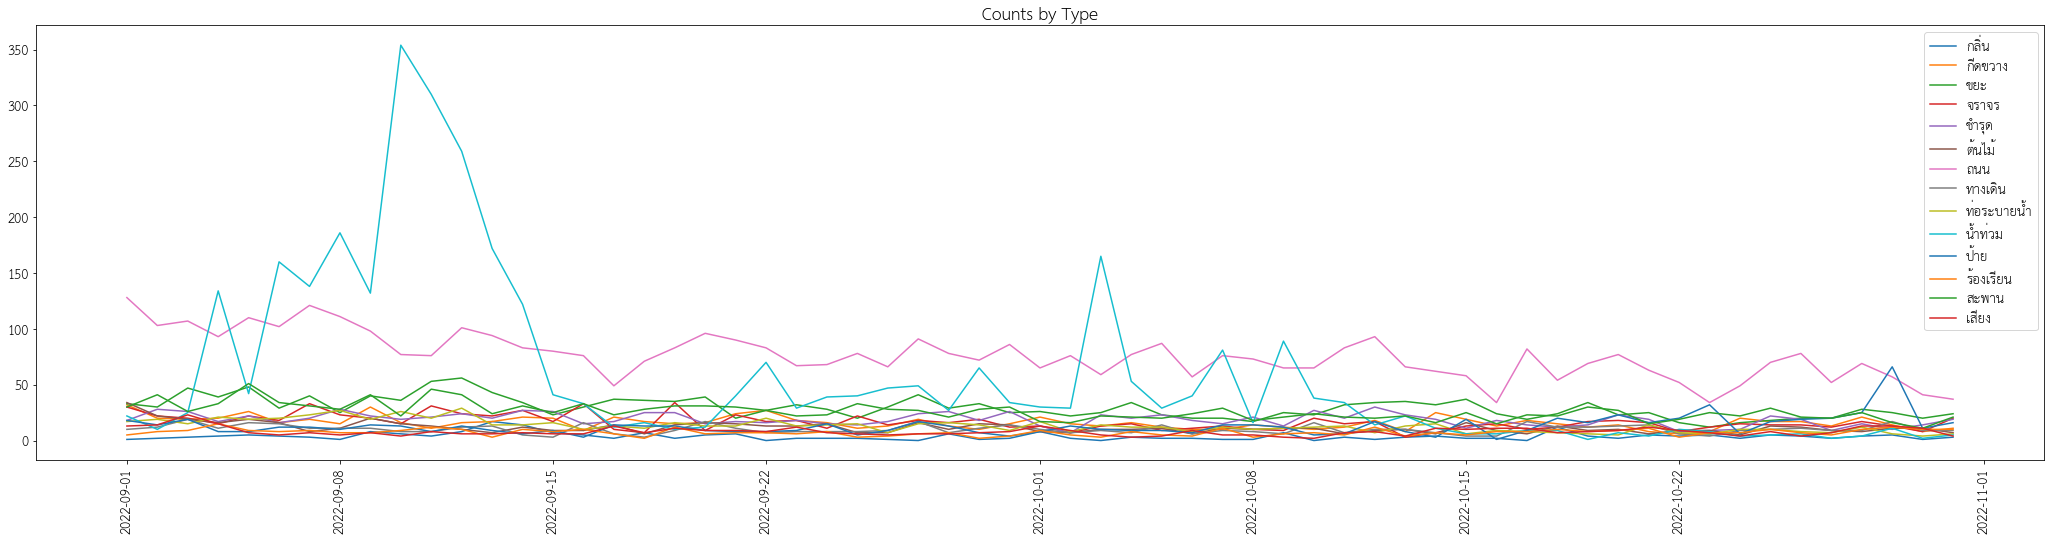

In [ ]:
mpl.font_manager.fontManager.addfont(fp)
mpl.rc('font', family='TH Sarabun New')

plt.figure(figsize=(36,8))
for column in time_series.columns:
    plt.plot(time_series.index, time_series[column], label=column)
plt.legend(loc='best')
plt.title('Counts by Type', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Black'})
plt.xticks(rotation = 90, fontweight="bold")
plt.rc('font', family='TH Sarabun New')
plt.show()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


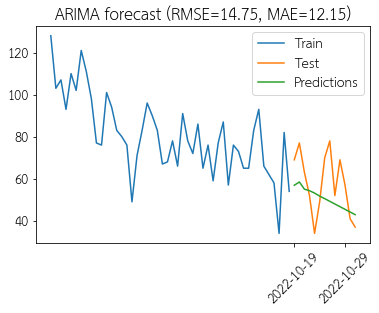

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df_filtered = df_index.loc[df_index.index.get_level_values('type') == 'ถนน']

train_size = int(len(df_filtered) * 0.8)
train, test = df_filtered[:train_size], df_filtered[train_size:]

train_labels = train.index.get_level_values(level=0).strftime('%Y-%m-%d')
train = train.values.flatten()
test_labels = test.index.get_level_values(level=0).strftime('%Y-%m-%d')
test = test.values.flatten()

model = ARIMA(train, order=(2,1,0))
model_fit = model.fit(disp=0)

predictions = model_fit.forecast(steps=len(test))[0]

mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(predictions - test))

plt.plot(train_labels, train, label='Train')
plt.plot(test_labels, test, label='Test')
plt.plot(test_labels, predictions, label='Predictions')
plt.title(f'ARIMA forecast (RMSE={rmse:.2f}, MAE={mae:.2f})')
plt.legend()
plt.xticks(test_labels[::10], rotation=45)
plt.show()

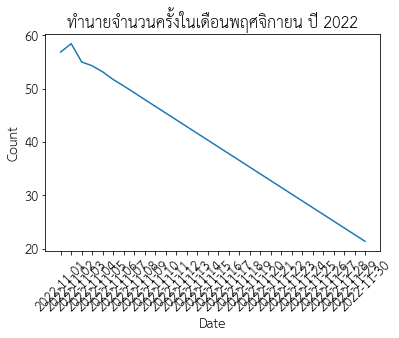

In [ ]:
dates = pd.date_range(start='2022-11-01', end='2022-11-30', freq='D').strftime('%Y-%m-%d')
predictions = model_fit.forecast(steps=len(dates))[0]
predicted_df = pd.DataFrame({'date': dates, 'predictions': predictions})
plt.plot(predicted_df['date'], predicted_df['predictions'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('ทำนายจำนวนครั้งในเดือนพฤศจิกายน ปี 2022')
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_labels, y=train, name='Train'))
fig.add_trace(go.Scatter(x=test_labels, y=test, name='Test'))
fig.add_trace(go.Scatter(x=test_labels, y=predictions, name='Predictions'))
fig.update_layout(title=f'ARIMA forecast (RMSE={rmse:.2f}, MAE={mae:.2f})', xaxis_tickangle=-45)
fig.show()

In [ ]:
df = df_index
df.head()

date        type   
2022-09-01  ถนน        128
            ต้นไม้      34
            ขยะ         33
            กีดขวาง     32
            จราจร       30
Name: type, dtype: int64

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from dash.dependencies import Input, Output

df = df_index

available_types = df.index.get_level_values('type').unique().tolist()

def create_arima_model(type):
    df_filtered = df.loc[df.index.get_level_values('type') == type]

    train_size = int(len(df_filtered) * 0.8)
    train, test = df_filtered[:train_size], df_filtered[train_size:]

    train_labels = train.index.get_level_values(level=0).strftime('%Y-%m-%d')
    train = train.values.flatten()
    test_labels = test.index.get_level_values(level=0).strftime('%Y-%m-%d')
    test = test.values.flatten()

    model = ARIMA(train, order=(2,1,0))
    model_fit = model.fit(disp=0)

    predictions = model_fit.forecast(steps=len(test))[0]

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(predictions - test))

    return train_labels, train, test_labels, test, predictions, rmse, mae
    
def create_figure(type):
    train_labels, train, test_labels, test, predictions, rmse, mae = create_arima_model(type)

    fig = px.line(x=train_labels, y=train, labels={'x': 'Date', 'y': 'Value'}, title=f'{type} ARIMA Forecast (RMSE={rmse:.2f}, MAE={mae:.2f})')
    fig.add_scatter(x=test_labels, y=test, name='Test')
    fig.add_scatter(x=test_labels, y=predictions, name='Predictions')

    fig.update_xaxes(tickangle=-45)
    fig.update_layout(showlegend=True)

    return fig

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='type-dropdown',
        options=[{'label': t, 'value': t} for t in available_types],
        value=available_types[0]
    ),
    dcc.Graph(id='forecast-graph')
])

@app.callback(
    Output('forecast-graph', 'figure'),
    [Input('type-dropdown', 'value')]
)
def update_figure(type):
    return create_figure(type)

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/



<ipython-input-76-5b7e97f89c79>:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-76-5b7e97f89c79>:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
